# PreEntrega Proyeecto Final

## *Abstract*

Este dataset contiene información sobre animales en refugios, incluyendo sus características físicas, comportamiento y resultado. Los datos incluyen variables como edad, raza, color, sexo y el resultado de su tiempo en el refugio, como adopción, transferencia, eutanasia o devolución al dueño. 

Es importante destacar que los animales en refugios son un tema relevante y que tiene un impacto significativo en la sociedad. Los refugios suelen ser el hogar temporal de animales que han sido abandonados, perdidos o maltratados, y es importante asegurarse de que estos animales tengan un futuro positivo y seguro. La competición en Kaggle ofrece una oportunidad para que los participantes utilicen sus habilidades en ciencia de datos para ayudar a los animales en refugios. Además, al desarrollar un modelo preciso para predecir el resultado de los animales en el refugio, se puede ayudar a los trabajadores del refugio a tomar decisiones informadas y a mejorar la vida de los animales en sus cuidados.

## Objetivo

Encontrar las características que hacen que ciertos animales tengan un outcome. Predicir el outcome de un animal según sus características.

## Contexto comercial

En este caso se realiza un análisis de los datos recolectados por un refugio para cumplir con nuestro objetivo.

## *Preguntas e hipótesis*

**¿Cuáles son los factores más importantes que influyen en el resultado final de los animales en el refugio?**
*Hipótesis:* Se espera que factores como la edad, la raza, el color y el sexo tengan un impacto significativo en el resultado final de los animales en el refugio.

**¿Hay diferencias en los resultados finales de los animales en función de su raza?**
*Hipótesis:* Se espera que haya diferencias en los resultados finales de los animales en función de su raza, ya que esto puede estar influenciado por la percepción cultural y los estereotipos asociados con ciertas razas.

**¿Hay una relación entre la edad de los animales y su resultado final en el refugio?**
*Hipótesis:* Se espera que haya una relación entre la edad de los animales y su resultado final en el refugio, ya que los animales más jóvenes o mayores pueden ser más atractivos para los adoptantes o menos propensos a ser adoptados.

**¿Hay una relación entre el color de los animales y su resultado final en el refugio?**
*Hipótesis:* Se espera que haya una relación entre el color de los animales y su resultado final en el refugio, ya que ciertos colores pueden ser más atractivos para los adoptantes.

**¿Hay una diferencia en los resultados finales de los animales en función de su sexo?**
*Hipótesis:* Se espera que haya una diferencia en los resultados finales de los animales en función de su sexo, ya que algunos adoptantes pueden preferir animales machos o hembras en particular.



## Contexto analítico

Se observan las librerías a utilizar.

In [ ]:
!pip install pandas-profiling
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
from scipy import stats

# drive.mount("/content/gdrive")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 6.8 MB/s eta 0:00:00


## Data Acquisition

Los datos que serán utilizados son aquellos que el refugio de animales ha proporcionado.

Estos datos cuentan con una variable -*outcome*- que brinda el resultado final de cada animal que pasó por la institución y variables descriptivas, por ejemplo:

* Nombre
* TipoAnimal (Tipo de animal)
* Sexo-Castracion (Sexo y estado de castración)
* Edad	
* Raza	
* ColorPelaje (Color de pelaje)

Entre otras.

In [ ]:
data = pd.read_csv('/content/gdrive/My Drive/Datasets/train.csv')
data.columns = ['ID', 'Nombre', 'Fecha', 'Outcome', 'SubOutcome', 'TipoAnimal','Sexo-Castracion','EdadAdopcion','Raza','ColorPelaje']
data.head()

,ID,Nombre,Fecha,Outcome,SubOutcome,TipoAnimal,Sexo-Castracion,EdadAdopcion,Raza,ColorPelaje
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan


## Data Wrangling

Se han realizan los ajustes de limpieza necesarios para dejar listos los datos para análisis.

* Se eliminan columnas que resultan innecesarias para el análisis.
* Se eliminan valores duplicados. Al ser un dataset de un refugio de animales, donde los datos fueron cargados por personas, es muy probable que haya datos duplicados. Por esto verificaremos la existencia de los mismos y eliminarlos.
* Se unifican todos los valores de la columna EdadAdopcion a la escala de años. Tenemos las edades en diferentes formatos (días, meses, semanas, años) por lo que optamos por unificarlos todos a años.
* Se simplifica la columna de Color de Pelaje a 3 valores distintos. Encontramos múltiples colores y combinaciones que nos resultara en muchos tipos de clasificación por color, por lo que decidimos simplificarlos a 4 tipos (White, Black, Cream y Other)

El conjunto de datos resultante cuenta con 26729 registros y 7 columnas.


In [ ]:
# Eliminamos esta columna porque su información no influye en el análisis.
del(data['ID'])
# Eliminamos esta columna porque la fecha en la que ingresaron los animales no es un dato que podamos relacionar, si tuviesemos la fecha de adopción quizás si.
del(data['Fecha'])
# Eliminamos esta columna porque consideramos suficiente la columna OutcomeType. 
del(data['SubOutcome'])

# Chequeamos si hay duplicados.
data.duplicated()
# Al ver que existían optamos por eliminar los registros duplicados.
data.drop_duplicates()

# Creamos una función que toma los valores y si contiene la palabra "day" (días) busca el número y lo divide por 365, 
# si tiene "week" (semana) lo divide por 52, si tiene "month" (mes) lo divide por 12 y si tiene "year" (año) le deja el número que tiene.
def age_to_years(item):
    if type(item) is str:
        item = [item]
    ages_in_years = np.zeros(len(item))
    for i in range(len(item)):
        if type(item[i]) is str:
            if 'day' in item[i]:
                ages_in_years[i] = int(item[i].split(' ')[0])/365
            if 'week' in item[i]:
                ages_in_years[i] = int(item[i].split(' ')[0])/52.1429
            if 'month' in item[i]:
                ages_in_years[i] = int(item[i].split(' ')[0])/12
            if 'year' in item[i]:
                ages_in_years[i] = int(item[i].split(' ')[0])    
        else:
            # item[i] is not a string but a nan
            ages_in_years[i] = 0
    return ages_in_years

# Le aplicamos la función a todos los valores de la columna AgeuponOutcome.
data['EdadAdopcion'] = age_to_years(data['EdadAdopcion']).round(1)

# Creamos otra función que si encuentra las palabras "White","Black","Cream" los clasifica como esos mismos y sino le asigna el valor "Other".
def new_colors(x):
    if pd.isnull(x):
        return 'Other'
    elif 'White' in x:
        return 'White'
    elif 'Black' in x:
        return 'Black'
    elif 'Cream' in x:
        return 'Cream'
    else:
        return 'Other'

# Aplicamos la función a la columna Color.
data.ColorPelaje = data.ColorPelaje.apply(lambda x : new_colors(x))

In [ ]:

# Generaremos un intervalo de confianza para verificar outliers.

#Elegimos la columna de interés.
col = 'EdadAdopcion'

# Calculamos el 25avo y el 75 percentil.
p25 = data[col].quantile(0.25)
p75 = data[col].quantile(0.75)

# Calculamos el IQR
iqr = p75 - p25

# Calculamos el intervalor de confianza.
confidence_level = 0.95
degrees_freedom = len(data) - 1
interval = stats.t.interval(confidence_level, degrees_freedom, loc=(p75+p25)/2, scale=iqr / (len(data) ** 0.5))

print("Intervalo de confianza al 95%:", interval)



Intervalo de confianza al 95%: (1.5664313068586733, 1.633568693141327)


El intervalo de confianza **(1.5664313068586733, 1.633568693141327)** significa que existe una probabilidad del **95%** de que la media real de una población se encuentre entre estos dos valores. En otras palabras, si tomamos muchas muestras de la misma población y calculamos los intervalos de confianza para cada una de ellas, el 95% de los intervalos de confianza resultantes contendrían la media real de la población.

In [ ]:
data.head()

,Nombre,Outcome,TipoAnimal,Sexo-Castracion,EdadAdopcion,Raza,ColorPelaje
0,Hambone,Return_to_owner,Dog,Neutered Male,1.0,Shetland Sheepdog Mix,White
1,Emily,Euthanasia,Cat,Spayed Female,1.0,Domestic Shorthair Mix,Cream
2,Pearce,Adoption,Dog,Neutered Male,2.0,Pit Bull Mix,White
3,NaN,Transfer,Cat,Intact Male,0.1,Domestic Shorthair Mix,Cream
4,NaN,Transfer,Dog,Neutered Male,2.0,Lhasa Apso/Miniature Poodle,Other


In [ ]:
np.shape(data)

(26729, 7)

# Análisis exploratorio de datos

## Análisis de variables



 **Nombre** : 
esta variable nos muestra si los animales del refugio fueron nombrados o no. Esto nos podría llegar a indicar si los animales con nombre tienen más probabilidad de ser adoptados o no. Esta variable posee 7.691 valores nulos, que serían los no-nombrados

In [ ]:
# Contabilizamos la cantidad de valores nulos en la columna.
nulos_name = data['Nombre'].isna().sum()
nulos_name

7691

In [ ]:
# Creamos una nueva columna que se llame "Nombrados" para poder obtener los animales nombrados y los que no.
# La información que queremos obtener de esta columna es si tenían o no nombre, por lo que buscamos a los que tienen nombre y le asignamos el valor "1".
data['Nombre'] = data[['Nombre']].fillna(value=0)
# Y le asignamos el valor "0" a los que no.
data['Nombrados'] = (data['Nombre'] != 0).astype('int64')
# Eliminamos la columna original "Nombre".
data = data.drop('Nombre', axis=1)

In [ ]:
# Mostramos la cantidad de valores por tipo.
data['Nombrados'].value_counts()

1    19038
0     7691
Name: Nombrados, dtype: int64

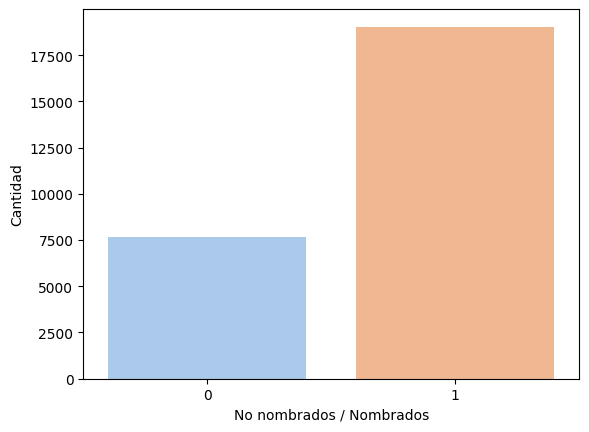

In [ ]:
# Creamos un gráfico que nos muestra la cantidad de nombrados y no nombrados.
sns.set_palette("pastel")
grafico = sns.countplot(data=data, x='Nombrados')
grafico.set(ylabel='Cantidad', xlabel='No nombrados / Nombrados')
plt.show()

A partir de este gráfico se identifica que la mayoría de los animales poseen un nombre.

**Outcome** : 
esta variable, una de las más importantes, nos permite clasificar y analizar el dataset con el "outcome" o proceso final de los animales al pasar por el refugio. Esta variable no posee valores nulos.

In [ ]:
# Mostramos la cantidad de valores por tipo.
data['Outcome'].value_counts()

Adoption           10769
Transfer            9422
Return_to_owner     4786
Euthanasia          1555
Died                 197
Name: Outcome, dtype: int64

In [ ]:
# Contabilizamos valores nulos.
nulos_Outcome = data['Outcome'].isna().sum()
nulos_Outcome

0

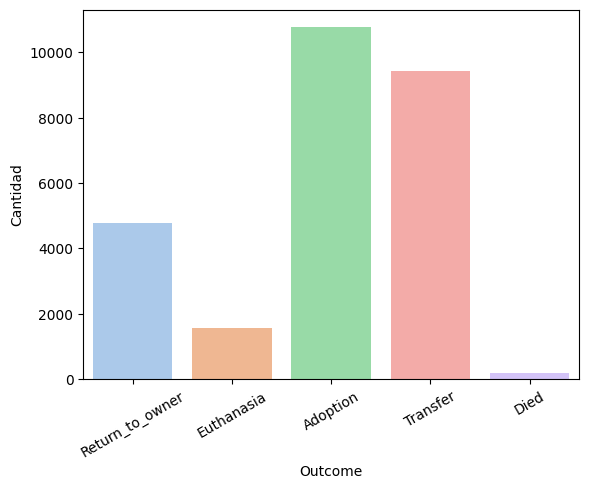

In [ ]:
# Creamos un gráfico para visualizarla cantidad de animales por su outcome.
sns.set_palette("pastel")
grafico = sns.countplot(data=data, x='Outcome')
grafico.set(ylabel='Cantidad')
plt.xticks(rotation=30)
plt.show()


A partir de este gráfico se destaca que:

- El mayor porcentaje de animales termina siendo **adoptados**.
- Luego le sigue un gran grupo de animales **transferidos**.
- Si bien es menor, hay un gran porcentaje *(casi la mitad de transferidos)* de animales que fueron **devueltos a sus dueños**.
- Afortunadamente hay un pequeño porcentaje de animales **sacrificados** y uno aún más pequeño de **fallecidos**.

**TipoAnimal** : 
esta variable, también muy importante, nos divide los datos y nos permite clasificar entre perros y gatos, los 2 únicos tipos de datos en el refugio. Podremos usar este dato para subdividir cualquier otra variable. Esta variable no posee valores nulos


In [ ]:
# Mostramos la cantidad de valores por tipo.
data['TipoAnimal'].value_counts()

Dog    15595
Cat    11134
Name: TipoAnimal, dtype: int64

In [ ]:
# Contabilizamos la cantidad de valores nulos.
nulos_TipoAnimal = data['TipoAnimal'].isna().sum()
nulos_TipoAnimal


0

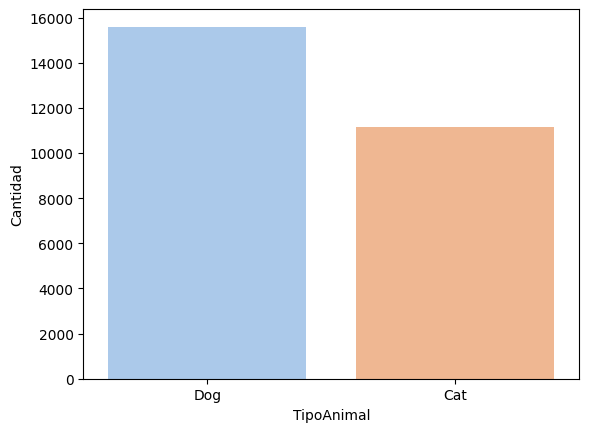

In [ ]:
# Creamos un gráfico que nos permite ver la cantidad de animales diferenciados por el tipo de animal (perro o gato/ dog or cat).
sns.set_palette("pastel")
grafico = sns.countplot(data=data, x='TipoAnimal')
grafico.set(ylabel='Cantidad')
plt.show()

A partir de este gráfico reconocemos un **41% de los animales son Gatos**, mientras que **la mayoría (casi 59%) son Perros**. También descartamos la posibilidad de que haya otro tipo de animales.

**Sexo-Castracion** :
esta variable nos proporciona información sobre el sexo y estado de castración del animal. Este dato es muy relevante para analizar su influencia en el outcome. Esta variable tiene únicamente un valor nulo.

In [ ]:
# Mostramos la cantidad de valores por tipo.
data['Sexo-Castracion'].value_counts()

Neutered Male    9779
Spayed Female    8820
Intact Male      3525
Intact Female    3511
Unknown          1093
Name: Sexo-Castracion, dtype: int64

In [ ]:
#Contabilizamos la cantidad de valores nulos.
nulos_Sexo_Castracion = data['Sexo-Castracion'].isna().sum()
nulos_Sexo_Castracion

1

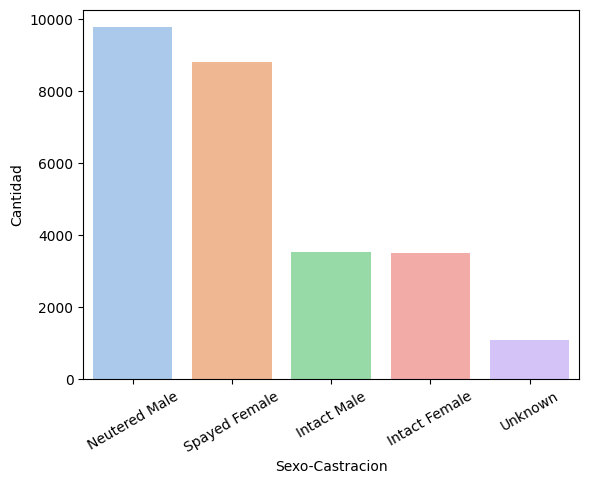

In [ ]:

# Creamos un gráfico que nos permite ver la cantidad de animales según su sexo/castración.
sns.set_palette("pastel")
grafico=sns.countplot(data=data, x='Sexo-Castracion')
grafico.set(ylabel='Cantidad')
plt.xticks(rotation=30)
plt.show()

A partir de este gráfico podemos definir que:

- La mayoría de los animales son **machos castrados**.
- Luego le siguen las **hembras castradas**.
- Hay casi la misma cantidad de **hembras y machos sin castrar**.
- Tenemos un pequeño porcentaje de sexo y estado de castración **desconocidos**.

**EdadAdopcion** : 
esta variable nos da el dato de la edad del animal al momento del outcome. Esto nos permite saber si la edad tiene influencia en este último, si el pasar más/menos tiempo en el refugio también. Esta variable no posee valores nulos.

In [ ]:
# Contabilizamos los valores por tipo.
data['EdadAdopcion'].value_counts()

0.2     4674
1.0     3969
2.0     3742
0.1     2285
3.0     1823
0.0     1284
4.0     1071
5.0      992
0.3      888
0.8      681
6.0      670
0.4      652
0.5      588
8.0      536
7.0      531
10.0     446
0.7      402
0.6      288
9.0      288
12.0     234
0.9      166
13.0     143
11.0     126
14.0      97
15.0      85
16.0      36
17.0      17
18.0      10
19.0       3
20.0       2
Name: EdadAdopcion, dtype: int64

In [ ]:
# Contabilizamos los valores nulos.
nulos_EdadAdopcion = data['EdadAdopcion'].isna().sum()
nulos_EdadAdopcion

0

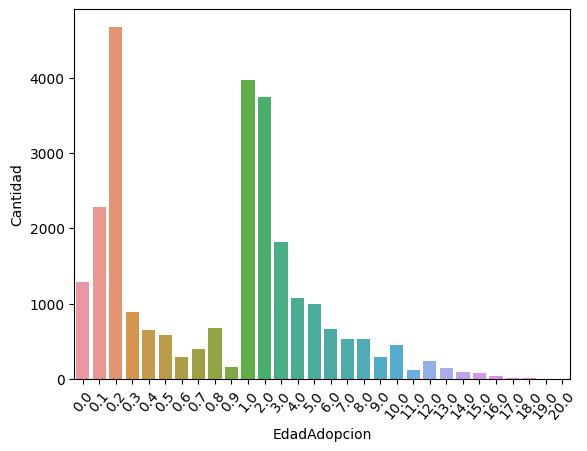

In [ ]:
# Creamos un gráfico que muestre la cantidad de animales por edad.
sns.set_palette("pastel")
grafico= sns.countplot(data=data, x='EdadAdopcion')
grafico.set(ylabel='Cantidad')
plt.xticks(rotation=50)
plt.show()


Este gráfico nos muestra la cantidad de animales según su edad. A partir de este podemos destacar que:

- Una gran mayoría de animales no llega al año de vida, destacandose la edad de **2 a 4 meses**.
- Luego sigue el grupo de **1 a 3 de años**.
- Hay muy pocos animales gerontes, pero entre ellos se destaca la edad de **10 años**.
- Hay una gran número de animales cachorros. 

**ColorPelaje** : 
esta variable divide a los animales según su color de pelaje, esto permitirá ver si influye o no en su outcome.

In [ ]:
data['ColorPelaje'].value_counts()

White    12186
Other     9687
Black     4434
Cream      422
Name: ColorPelaje, dtype: int64

In [ ]:
nulos_Color = data['ColorPelaje'].isna().sum()
nulos_Color

0

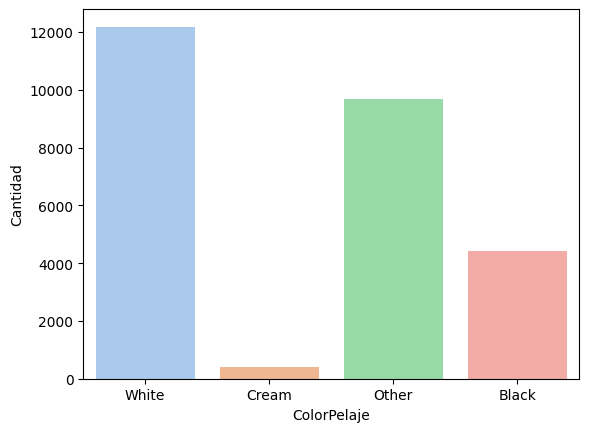

In [ ]:
sns.set_palette("pastel")
grafico = sns.countplot(data=data, x='ColorPelaje')
grafico.set(ylabel='Cantidad')
plt.show()

Tenemos la mayoría de animales de pelaje blanco y un gran grupo de "Otros".

## EDA

**EdadAdopcion vs Outcome**

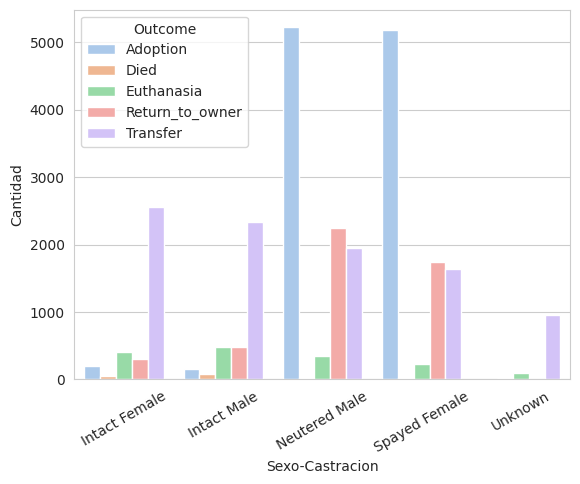

In [ ]:
grouped = data.groupby(['Sexo-Castracion', 'Outcome'])
counts = grouped['Sexo-Castracion'].count().reset_index(name='counts')
sns.set_palette("pastel")
grafico = sns.barplot(x='Sexo-Castracion', y='counts', data=counts, hue='Outcome')
grafico.set(ylabel='Cantidad')
plt.xticks(rotation=30)
plt.show()

Aquí observamos que las mascotas **más propensas a ser adoptadas son las que no superan el año de edad**. 

A su vez los animales fallecidos se encuentran debajo de los 6 meses, por lo que se podría poner mayor atención en éstos para obtener más adopciones.

Los animales sacrificados tienen una media de 2 años, por lo general su final es este luego de haber estado mucho tiempo en el refugio. Al igual que las mascotas que son devueltas a sus dueños alcanzan los 3 años de edad.

Destacamos que los animales transferidos sean los más jóvenes para que tengan posibilidades de ser adoptados en otros refugios.


**Nombrados vs Outcome**

<Axes: xlabel='Nombrados', ylabel='count'>

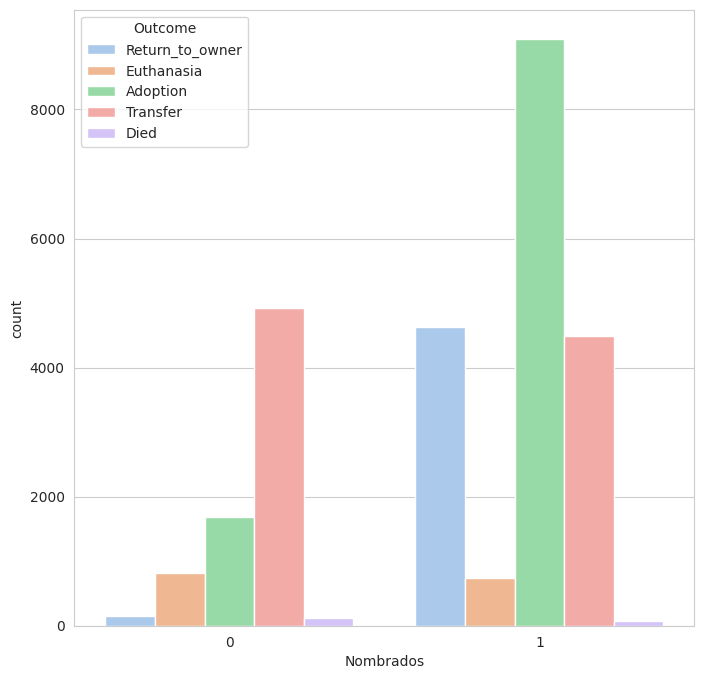

In [117]:
plt.figure(figsize=(8, 8))
plt.xlabel('Outcome')
plt.ylabel('Edad de Adopción')
sns.countplot(x='Nombrados', hue='Outcome', data=data)

Aquí observamos que las mascotas **más propensas a ser adoptadas son las que poseen un nombre**. 

En el caso de los devueltos, también son en su mayoría nombrados. Podemos deducir que esto sucede ya que tuvieron dueños anteriores.

Por otra parte los transferidos tienen casi la misma cantidad de nombrados que de 
no-nombrados, siendo evidente que en estos casos esa cualidad no es tenida en cuenta.

Lo mismo sucede en los fallecidos y sacrificados, no es un factor que influencie en estos outcomes.



**TipoAnimal vs Outcome**

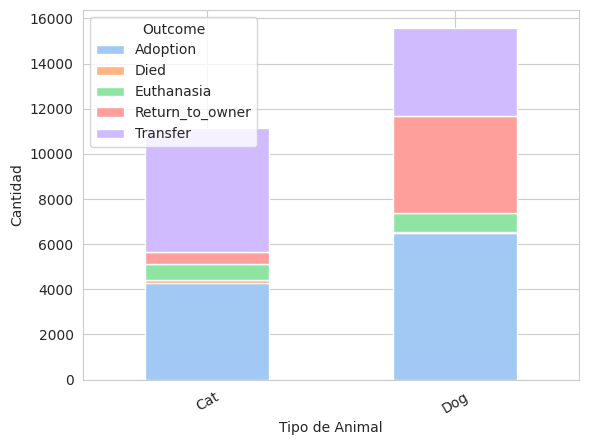

In [126]:
sns.set_palette("pastel")
grouped = data.groupby(['TipoAnimal', 'Outcome'])['Outcome'].count().reset_index(name='count')
pivoted = grouped.pivot(index='TipoAnimal', columns='Outcome', values='count')
ax = pivoted.plot(kind='bar', stacked=True)
ax.set_xlabel('Tipo de Animal')
ax.set_ylabel('Cantidad')
plt.xticks(rotation=30)
plt.show()

Aquí observamos que las mascotas **más propensas a ser adoptadas son los perros**. 

También es mayor la cantidad de perros devueltos a sus dueños que los gatos. 
*En los Estados Unidos, se estima que aproximadamente el 44% de los hogares son dueños de al menos un perro, mientras que solo el 29% son dueños de al menos un gato. Además, según la American Society for the Prevention of Cruelty to Animals (ASPCA), los perros tienen una tasa de adopción más alta que los gatos en los refugios de animales.*

En el caso de los transferidos es mayor la cantidad en gatos. Podemos deducirlo a la inversa, al tener menos adopciones se transiferen más.

Para el caso de los sacrificados se mantienen parecidos los valores, mientras que para los fallecidos los gatos tienen un poco más que los perros.

**ColorPelaje vs Outcome**

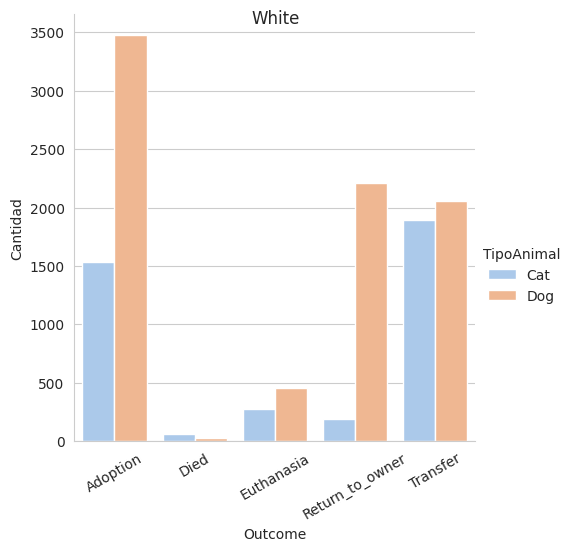

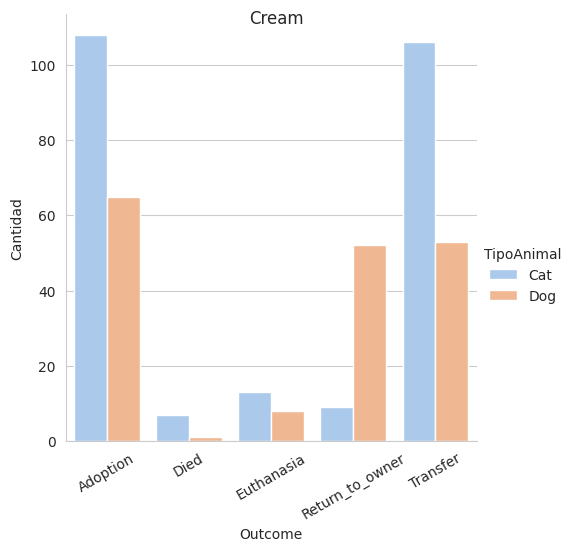

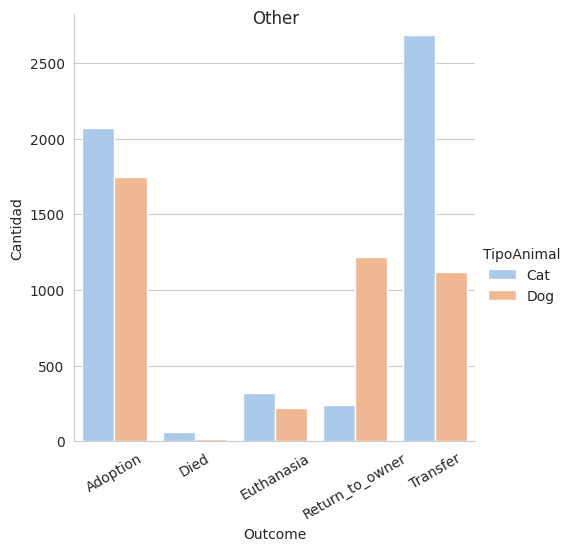

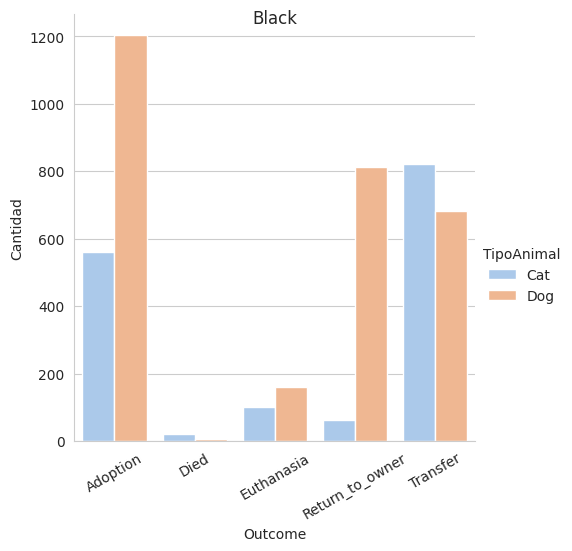

In [128]:
data = data.dropna(subset=['TipoAnimal', 'Outcome', 'ColorPelaje'])
for sex in data['ColorPelaje'].unique():
    sex_df = data[data['ColorPelaje'] == sex]
    outcome_counts = sex_df.groupby(['TipoAnimal', 'Outcome']).size().reset_index(name='count')
    
    g = sns.catplot(x='Outcome', y='count', hue='TipoAnimal', data=outcome_counts, kind='bar')
    g.fig.suptitle(sex)
    g.set(ylabel='Cantidad')
    plt.xticks(rotation=30)
    plt.show()

Aquí observamos que las mascotas** más propensas a ser adoptadas son los perros de pelaje blanco y los gatos de otros tipos de pelaje**. 

El grupo de perros blancos se destaca en todos los outcomes, esto podría llegar a ser un sesgamiento por la cantidad de perros blancos que existen dentro del dataset.

Por otra parte, los gatos de otros tipos de pelaje también predominan en todos los outcomes a expeción de los fallecidos, en el cuál se destacan los gatos blancos. Ésto puede deberse a que los animales de pelaje blanco son más propensos a tener enfermedades.




**Sexo-Castracion vs Outcome**

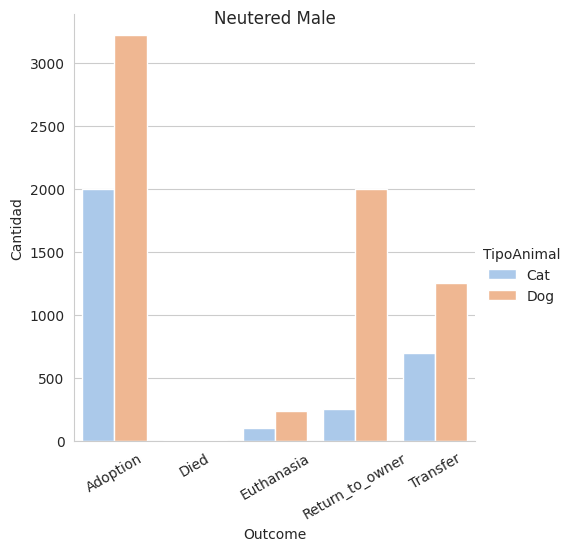

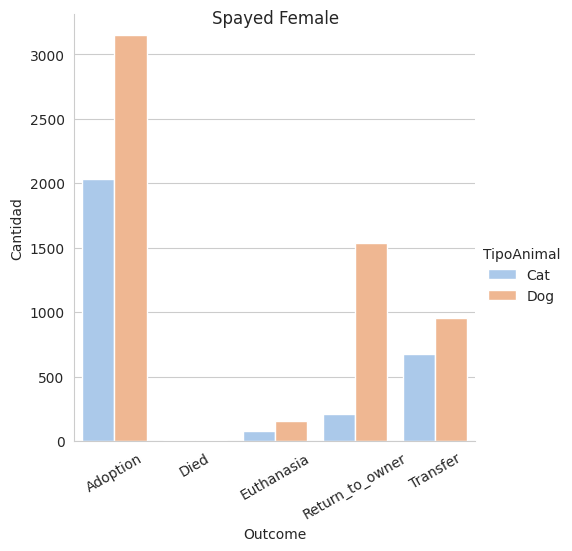

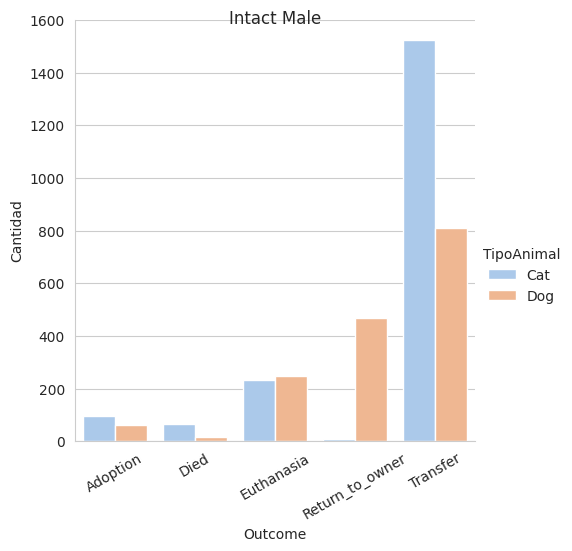

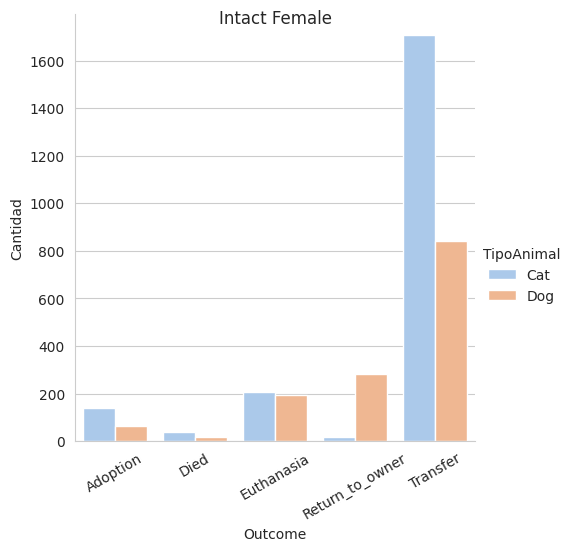

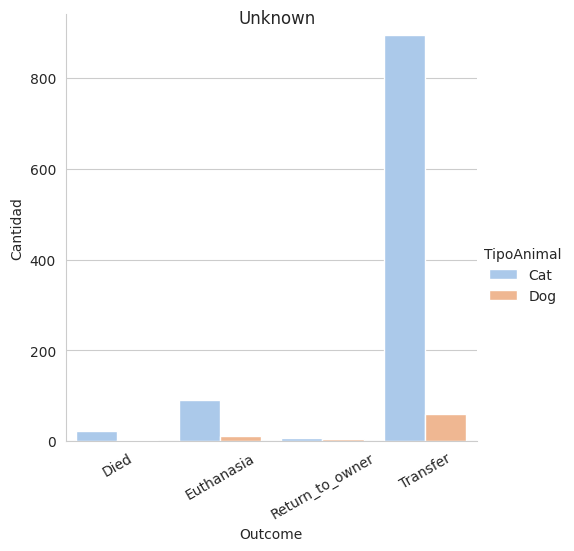

In [127]:
data = data.dropna(subset=['TipoAnimal', 'Outcome', 'Sexo-Castracion'])
for sex in data['Sexo-Castracion'].unique():
    sex_df = data[data['Sexo-Castracion'] == sex]
    outcome_counts = sex_df.groupby(['TipoAnimal', 'Outcome']).size().reset_index(name='count')
    
    g = sns.catplot(x='Outcome', y='count', hue='TipoAnimal', data=outcome_counts, kind='bar')
    g.fig.suptitle(sex)
    g.set(ylabel='Cantidad')
    plt.xticks(rotation=30)
    plt.show()

Aquí observamos que las mascotas **más propensas a ser adoptadas son las hembras y machos castrados/as para ambos gatos y perros**.

En el caso de los animales transferidos se destacan las hembras s/castrar, los machos s/castrar para el caso de los gatos, mientras que para los perros serán las hembras y machos castrados/as.

Para las mascotas fallecidas se destacan las que no han sido castradas, esto es muy probable ya que son más propensas a tener enfermedades en los órganos reproductores. También coincide con los números de los animales sacrificados.

Por otra parte las mascotas devueltas son en su mayoría ya castradas, esto podría deberse a que fueron castradas por sus dueños anteriores o porque antes de ser devueltas fueron castradas por el refugio.




# Storytelling

Este conjunto de datos es sobre los resultados de los animales en un refugio . Contiene información sobre más de **26,000 animales** y su destino final en el refugio, así como detalles sobre su edad, raza, sexo y estado de salud.

Al explorar los datos, se descubre que la mayoría de los animales que ingresan al refugio son **perros**, seguidos de **gatos**.

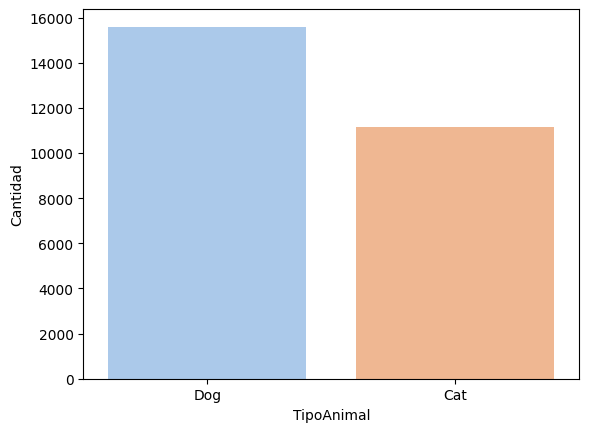

In [ ]:
sns.set_palette("pastel")
grafico = sns.countplot(data=data, x='TipoAnimal')
grafico.set(ylabel='Cantidad')
plt.show()

 Además, la mayoría de los animales que ingresan al refugio son jóvenes, con **menos de 2 años de edad**.

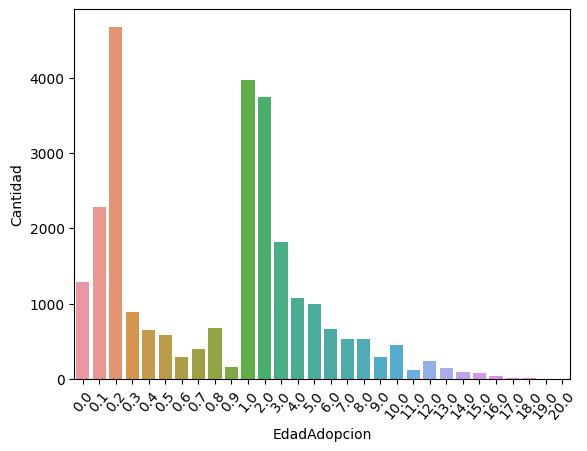

In [ ]:
sns.set_palette("pastel")
grafico= sns.countplot(data=data, x='EdadAdopcion')
grafico.set(ylabel='Cantidad')
plt.xticks(rotation=50)
plt.show()

También se puede observar que el sexo y la edad del animal parecen estar relacionados con su *outcome* en el refugio. Los perros y gatos castrados **tienden a tener tasas de adopción más altas que aquellos que no están castrados**. 

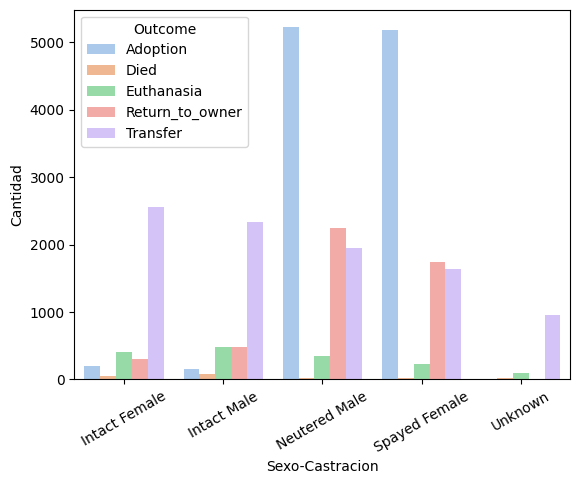

In [ ]:
grouped = data.groupby(['Sexo-Castracion', 'Outcome'])
counts = grouped['Sexo-Castracion'].count().reset_index(name='counts')
sns.set_palette("pastel")
grafico = sns.barplot(x='Sexo-Castracion', y='counts', data=counts, hue='Outcome')
grafico.set(ylabel='Cantidad')
plt.xticks(rotation=30)
plt.show()

Además, los animales más jóvenes tienen más probabilidades de ser adoptados que aquellos que son mayores.

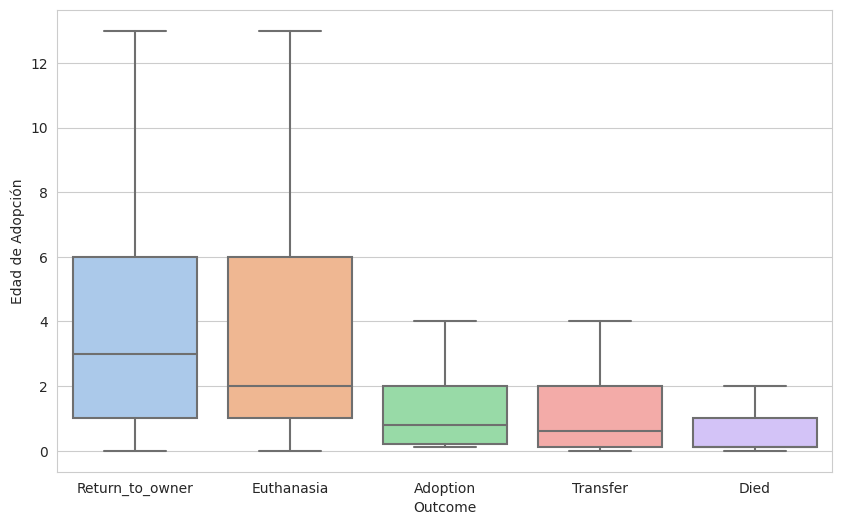

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(x="Outcome", y="EdadAdopcion", data=data, showfliers=False)
plt.xlabel('Outcome')
plt.ylabel('Edad de Adopción')
plt.show()

En términos de los resultados finales para los animales, la mayoría de los perros y gatos en el refugio son adoptados o transferidos a otras organizaciones de rescate. Sin embargo, también hay una proporción significativa de animales que son sacrificados, ya sea debido a problemas de salud o comportamiento.



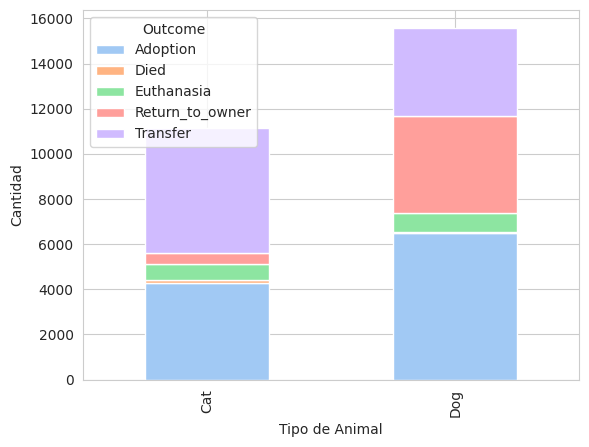

In [ ]:
sns.set_palette("pastel")
grouped = data.groupby(['TipoAnimal', 'Outcome'])['Outcome'].count().reset_index(name='count')
pivoted = grouped.pivot(index='TipoAnimal', columns='Outcome', values='count')
ax = pivoted.plot(kind='bar', stacked=True)
ax.set_xlabel('Tipo de Animal')
ax.set_ylabel('Cantidad')
plt.show()

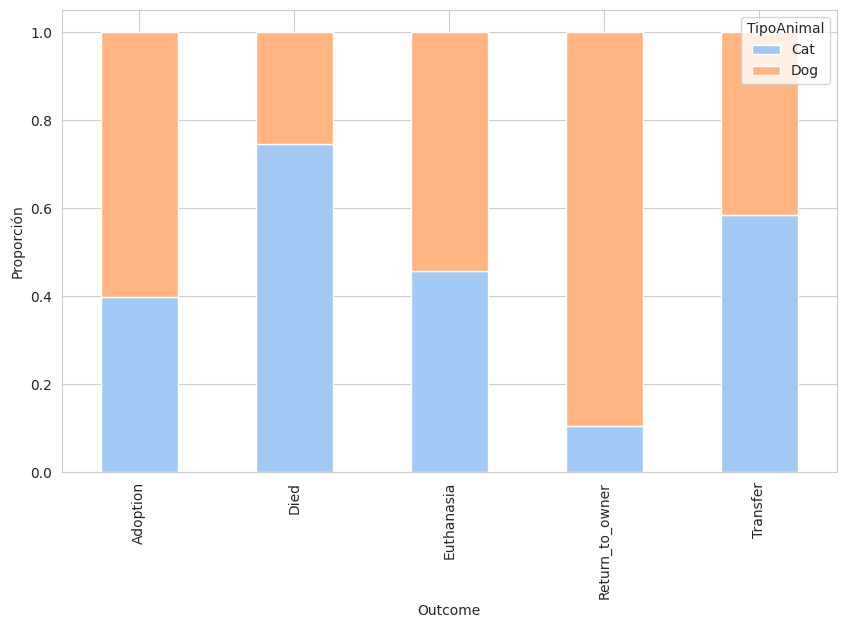

In [ ]:
ct = pd.crosstab(data['Outcome'], data['TipoAnimal'])
ct = ct.apply(lambda x: x / x.sum(), axis=1)
ct.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Outcome')
plt.ylabel('Proporción')
plt.show()

# Presentación

Se deja el link para visualizar la presentación del proyecto: https://docs.google.com/presentation/d/1Qk-oSfnOqqEGVkfjF3rxTMIb4MkB1SnE0L7vOIURLQE/edit?usp=drivesdk

# Github

Se deja link del proyecto en github: